In [ ]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
#This analysis helps you to find the "locations" that Twitter has trending topic information for. 
#The response is an array of "locations" that encode the location's WOEID 
#A WOEID is a Yahoo:" Where On Earth ID"
#comment out #api.trends_available() to see the results


#api.trends_available()

In [3]:
#To find the closet trendy hashtags in any city, type the lon & lat, example below Lon&Lat for San Francisco
api.trends_closest(37.77, -122.41)

#Analysis and how to find the closet trends:
#Go to http://woeid.rosselliot.co.nz/ 
#Type in "Search Place": San Francisco
#Then find the woeid#: 2487956 to know where the most hastags trends in San Francisco

#This analysis helps you know where exactly the most active tags/accounts in City in case you need to start a promotion or target consumers or for political reasons


[{'name': 'San Francisco',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2487956',
  'parentid': 23424977,
  'country': 'United States',
  'woeid': 2487956,
  'countryCode': 'US'}]

In [4]:
#To see What is the most active hashtags in San Francisco, you can type the code below + the woeid
api.trends_place(2487956)

#Analysis:
# Trends name shows the most active tags in San Francisco by url, query, tweet_volume

[{'trends': [{'name': 'Mary Oliver',
    'url': 'http://twitter.com/search?q=%22Mary+Oliver%22',
    'promoted_content': None,
    'query': '%22Mary+Oliver%22',
    'tweet_volume': 69596},
   {'name': '#Illuminate2019',
    'url': 'http://twitter.com/search?q=%23Illuminate2019',
    'promoted_content': None,
    'query': '%23Illuminate2019',
    'tweet_volume': None},
   {'name': '#MK11',
    'url': 'http://twitter.com/search?q=%23MK11',
    'promoted_content': None,
    'query': '%23MK11',
    'tweet_volume': 55337},
   {'name': 'Afghanistan',
    'url': 'http://twitter.com/search?q=Afghanistan',
    'promoted_content': None,
    'query': 'Afghanistan',
    'tweet_volume': 202762},
   {'name': 'Betty White',
    'url': 'http://twitter.com/search?q=%22Betty+White%22',
    'promoted_content': None,
    'query': '%22Betty+White%22',
    'tweet_volume': 92412},
   {'name': 'Mortal Kombat',
    'url': 'http://twitter.com/search?q=%22Mortal+Kombat%22',
    'promoted_content': None,
    'que

In [5]:
#loop inside the most active tags by tweet volume
active_tweets = api.trends_place(2487956)
for tweet_volume in active_tweets:

    # Utilize JSON dumps to generate a pretty-printed json
    print(json.dumps(tweet_volume, sort_keys=True, indent=4, separators=(',', ': ')))


{
    "as_of": "2019-01-18T00:42:06Z",
    "created_at": "2019-01-18T00:38:52Z",
    "locations": [
        {
            "name": "San Francisco",
            "woeid": 2487956
        }
    ],
    "trends": [
        {
            "name": "Mary Oliver",
            "promoted_content": null,
            "query": "%22Mary+Oliver%22",
            "tweet_volume": 69596,
            "url": "http://twitter.com/search?q=%22Mary+Oliver%22"
        },
        {
            "name": "#Illuminate2019",
            "promoted_content": null,
            "query": "%23Illuminate2019",
            "tweet_volume": null,
            "url": "http://twitter.com/search?q=%23Illuminate2019"
        },
        {
            "name": "#MK11",
            "promoted_content": null,
            "query": "%23MK11",
            "tweet_volume": 55337,
            "url": "http://twitter.com/search?q=%23MK11"
        },
        {
            "name": "Afghanistan",
            "promoted_content": null,
            "quer

In [6]:
#To target a user or a tag and analyse it
target_term = "NewYorkForever"

# Search for most recent tweet directed to the account
public_tweets = api.search(target_term, count=1, result_type="recent")

# Extract all hashtags from tweets directed to the account
for tweet in public_tweets["statuses"]:

    # Print tweet in JSON
    print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))

    # Print tweet text
    print(tweet["text"])

    # Loop through all hashtags and print each one included
    for hashtag in tweet["entities"]["hashtags"]:
        print(hashtag["text"])





{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Jan 18 00:40:50 +0000 2019",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    50,
                    60
                ],
                "text": "NBALondon"
            },
            {
                "indices": [
                    68,
                    77
                ],
                "text": "DCFamily"
            },
            {
                "indices": [
                    80,
                    95
                ],
                "text": "NewYorkForever"
            }
        ],
        "media": [
            {
                "display_url": "pic.twitter.com/8y1bHrX1gf",
                "expanded_url": "https://twitter.com/NBAItalia/status/1086016935467380736/photo/1",
                "id": 1086016659679256576,
                "id_str": "1086016659679256576",
                "indices": [
                    96,
                    11

In [7]:
#To analyse the length of time of hastags activity
# let's consider the top 4 tags
target_tags = ["#MK11", "#Mary Oliver", "#Mortal Kombat", "#Pelosi"]
time_between_tweets = []

# Loop through each hashtag
for tag in target_tags: #bigdata
    
    # Create array to record all date-times of tweets
    tweet_times = []

    # Get 100 tweets on targetted tag
    public_tweets = api.search(tag, rpp=100)
    print(tag)

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
    
    # Convert all tweet times into datetime objects
    tweet_time_objects = []

    # Add each datetime object into the array
    for x in range(len(tweet_times)):
        tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
        tweet_time_objects.append(tweet_datetime)

    # Calculate the time between tweets
    time_in_between = []

    # Calculate the time in between each tweet
    for x in range(len(tweet_time_objects)-1):
        secs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) 
        time_in_between.append(secs_apart)

    # Seconds Between Tweets
    print("Avg. Seconds Between Tweets: %s" % np.mean(time_in_between))
    print("")

#MK11
Avg. Seconds Between Tweets: 2.0

#Mary Oliver
Avg. Seconds Between Tweets: 1128.75

#Mortal Kombat
Avg. Seconds Between Tweets: 2783.230769230769

#Pelosi
Avg. Seconds Between Tweets: 2.857142857142857



In [ ]:
#Analysis of the activity above:
#The most active #hastag between the 4 most trending and popular hastags
#is MK11: every 2 seconds, there is someone tweeting and using this hastag


In [66]:
#Top 5 accounts tweeting under these hashtags
#Later

In [8]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [15]:
# Let's consider the target user Account below is the active user who tweet under a target hastag for us
#Below is a sentiment analysis of these users 
target_user = ("@DalaiLama", "@realdonaldtrump", "@katyperry")

In [16]:
# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(10):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

    # Print the Averages
    print("")
    print("User: %s" % user)
    print("Compound: %s" % np.mean(positive_list))
    print("Positive: %s" % np.mean(positive_list))
    print("Neutral: %s" % np.mean(neutral_list))
    print("Negative: %s" % np.mean(negative_list))



User: @DalaiLama
Compound: 0.28085
Positive: 0.28085
Neutral: 0.6633500000000001
Negative: 0.05584999999999999

User: @realdonaldtrump
Compound: 0.11720000000000003
Positive: 0.11720000000000003
Neutral: 0.7809999999999999
Negative: 0.10175000000000001

User: @katyperry
Compound: 0.2018
Positive: 0.2018
Neutral: 0.7672999999999999
Negative: 0.0308


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [22]:
# # Counter
counter = 1

# Variables for holding sentiments
sentiments = []
target_user1 = ("@realdonaldtrump")
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1,6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page = x)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweet Number": counter})
        
        # Add to counter 
        counter = counter + 1


In [23]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Number
0,-0.4714,Thu Jan 17 15:29:19 +0000 2019,0.568,0.249,0.183,1
1,-0.8091,Thu Jan 17 15:04:29 +0000 2019,0.553,0.343,0.104,2
2,0.2566,Thu Jan 17 14:04:35 +0000 2019,0.702,0.123,0.175,3
3,-0.1280,Wed Jan 16 12:49:21 +0000 2019,0.717,0.132,0.151,4
4,0.2023,Wed Jan 16 12:33:04 +0000 2019,0.917,0.000,0.083,5


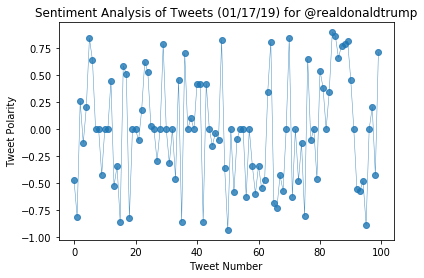

In [24]:
 # Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user1))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweet Number")
plt.show()

In [25]:
# List to hold sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Grab 25 tweets
public_tweets = api.search(target_user1, count=25, result_type="recent")

# Loop through all tweets
for tweet in public_tweets["statuses"]:

    # Run Vader Analysis on each tweet
    compound = analyzer.polarity_scores(tweet["text"])["compound"]
    pos = analyzer.polarity_scores(tweet["text"])["pos"]
    neu = analyzer.polarity_scores(tweet["text"])["neu"]
    neg = analyzer.polarity_scores(tweet["text"])["neg"]

    # Add each value to the appropriate array
    compound_list.append(compound)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)

# Store the Average Sentiments
sentiment = {"Compound": np.mean(compound_list),
             "Positive": np.mean(positive_list),
             "Neutral": np.mean(negative_list),
             "Negative": np.mean(neutral_list)}

# Print the Sentiments
print(sentiment)
print("")


{'Compound': 0.00781739130434782, 'Positive': 0.0893913043478261, 'Neutral': 0.08147826086956522, 'Negative': 0.8290434782608697}



In [ ]:
from __future__ import print_function
import tweepy
import json
from pymongo import MongoClient

In [ ]:
# assuming you have mongoDB installed locally
# and a database called 'twitterdb'
MONGO_HOST= 'mongodb://localhost/twitterdb'  

In [ ]:
WORDS = ['#bigdata', '#AI', '#datascience', '#machinelearning', '#ml', '#iot']


In [ ]:
class StreamListener(tweepy.StreamListener):    
    #This is a class provided by tweepy to access the Twitter Streaming API. 
 
    def on_connect(self):
        # Called initially to connect to the Streaming API
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        # On error - if an error occurs, display the error / status code
        print('An Error has occured: ' + repr(status_code))
        return False
 
    def on_data(self, data):
        #This is the meat of the script...it connects to your mongoDB and stores the tweet
        try:
            client = MongoClient(MONGO_HOST)
            
            # Use twitterdb database. If it doesn't exist, it will be created.
            db = client.twitterdb
    
            # Decode the JSON from Twitter
            datajson = json.loads(data)
            
            #grab the 'created_at' data from the Tweet to use for display
            created_at = datajson['created_at']
 
            #print out a message to the screen that we have collected a tweet
            print("Tweet collected at " + str(created_at))
            
            #insert the data into the mongoDB into a collection called twitter_search
            #if twitter_search doesn't exist, it will be created.
            db.twitter_search.insert(datajson)
        except Exception as e:
           print(e)

In [ ]:

#Set up the listener. The 'wait_on_rate_limit=True' is needed to help with Twitter API rate limiting.
listener = StreamListener(api=tweepy.API(wait_on_rate_limit=True)) 
streamer = tweepy.Stream(auth=auth, listener=listener)
#print("Tracking: " + str(WORDS))
streamer.filter(track=WORDS)

In [33]:
from bs4 import BeautifulSoup
import requests
import pymongo

In [34]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [35]:
# Define database and collection
db = client.nhl_db
collection = db.articles

In [36]:
# URL of page to be scraped
url = 'https://twitter.com/search-home'

# Retrieve page with the requests module
response = requests.get(url)
# Create BeautifulSoup object; parse with 'lxml'
soup = BeautifulSoup(response.text, 'lxml')